<a href="https://colab.research.google.com/github/DAI-SUKe6/935442-Image-processing-class-of-2022/blob/main/%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B8%AA%E0%B8%AD%E0%B8%9A%E0%B8%9B%E0%B8%8F%E0%B8%B4%E0%B8%9A%E0%B8%B1%E0%B8%95%E0%B8%B4%E0%B8%9B%E0%B8%A5%E0%B8%B2%E0%B8%A2%E0%B8%A0%E0%B8%B2%E0%B8%84_935442.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.1 ให้ทำประมวลผลภาพโดยใช้วิธี negative gamma logarithm threshold ให้เลือก 1 วิธี**

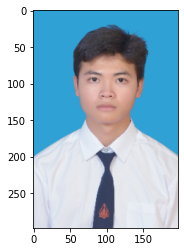

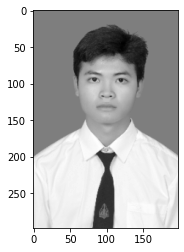

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('/content/student.png') # BGR
gray = cv2.imread('/content/student.png', 0) # gray
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(imgRGB)
plt.show()
plt.imshow(gray, cmap='gray')
plt.show()
     

# **1.2 ให้ทำการประมวลผลภาพให้เรียบ (image smoothing) (5 คะแนน)**

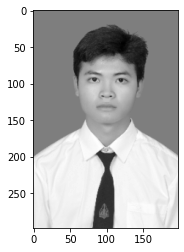

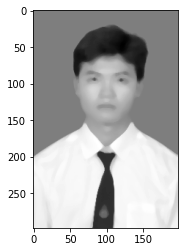

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('/content/student.png') # BGR
gray = cv2.imread('/content/student.png', 0) # gray
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_smoothing = cv2.medianBlur(gray,7)

plt.imshow(gray, cmap='gray')
plt.show()
plt.imshow(img_smoothing, cmap='gray')
plt.show()

# **1.3 ให้ทำการประมวลผลภาพให้คมชัด (image sharpening) (5 คะแนน)**

[[-1 -1 -1]
 [-1  9 -1]
 [-1 -1 -1]]


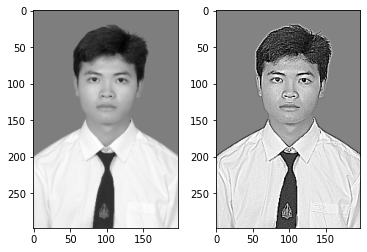

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('/content/student.png') # BGR
gray = cv2.imread('/content/student.png', 0) # gray
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

filterSharp = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
img_sharpen = cv2.filter2D(gray, -2, filterSharp)
print(filterSharp)
plt.subplot(121), plt.imshow(gray, cmap = 'gray')
plt.subplot(122), plt.imshow(img_sharpen, cmap = 'gray')
plt.show()

# **2.1 ให้ทำการตรวจจับใบหน้าของตนเองด้วยวิธีตรวจจับสี (Color) และให้ใช้วิธีปรับโครงสร้างภาพ**
(Morphological operations) ด้วย (10 คะแนน)

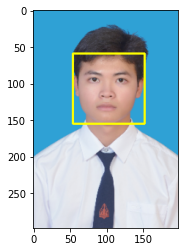

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('/content/student.png') # Zion face color = R G B (127 107 66)
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# กำหนด ช่วง ค่า สี ที่ เป็นไปได้ ของ วัตถุ หรือ ใบหน้า (ค่าต่ำสุด ค่าสูงสุด)
# Suggess = low_color = (120 100 60), upper_color = (240 240 240) 
lower_color = np.array([12,29, 89], dtype='uint8') # BG Rrgb(231,176,165)
upper_color = np.array([228, 176, 163], dtype='uint8')
obj = cv2.inRange(img, lower_color, upper_color)

st  = cv2.getStructuringElement(cv2.MORPH_RECT,(1,1))
# iterations ขยายโครงสร้างภาพ หนึ่งครั้ง
obj1 = cv2.dilate(obj, st, iterations=10)

regions, hierarchy = cv2.findContours(obj1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for r in regions:
  (x,y,w,h) = cv2.boundingRect(r)
  if (h>40):
    cv2.rectangle(imgRGB, (x,y), (x+w,y+h), (255,255,0), 2)

plt.imshow(imgRGB)
plt.show()

# **2.2 ให้ใช้วิธีการของปัญญาประดิษฐ์หรือ AI ในการตรวจจับตำแหน่งของใบหน้าตนเอง (5 คะแนน)**

1/1 [==============================] - 0s 246ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

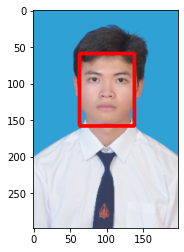

In [ ]:
import cv2
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN

img = cv2.imread('/content/student.png') # BGR
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # แปลงเป็น RGB แล้วเรียบร้อย

faceDectector = MTCNN() # เรียกใช้ฟังก์ชัน MTCNN()
faces = faceDectector.detect_faces(imgRGB) # กำหนดภาพที่นำเข้าเป็น ภาพแบบที่แปลงเป็น RGB เสร็จแล้ว

# ตัวแปลง face สามารถเปลี่ยนชื่อได้
for face in faces:
  (x, y, w, h) = face['box'] # list [array]
  # w กว้าง, h สูง, x y จุดเริ่มต้น, ทำการตีกรอบ รอบใบหน้า เป็นสีแดง RGB(r,g,b), 10 เป็นขนาดเส้นที่ตีกรอบ
  cv2.rectangle(imgRGB,(x,y),(x+w,y+h),(255,0,0),4)

plt.imshow(imgRGB) # กำหนดแสดงผล
plt.show

In [ ]:
!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 55.7 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **3. ให้เลือก Download ภาพจากเว็บไซต์จากอินเตอร์เน็ต มา 2 ประเภท ๆ ละ 20 ภาพ**
# **แล้วทำการรู้จำภาพให้ใช้วิธีการของปัญญาประดิษฐ์หรือ AI (10 คะแนน)**

553467096/553467096 [==============================] - 18s 0us/step


35363/35363 [==============================] - 0s 0us/step


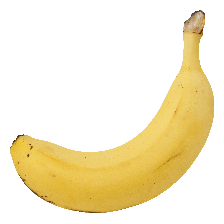

1. banana: 99.61%
2. hook: 0.09%
3. lemon: 0.07%
4. spaghetti_squash: 0.06%
5. orange: 0.06%


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import argparse
import cv2

inputShape = (224, 224)
preprocess = imagenet_utils.preprocess_input
image = load_img('/content/image_banana/1.jpg',target_size=inputShape)
img = load_img('/content/image_banana/1.jpg',target_size=inputShape)
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess(image)
model = VGG16(weights="imagenet")
preds = model.predict(image)
P = imagenet_utils.decode_predictions(preds)
display(img)
for (i, (imagenetID, label, prob)) in enumerate(P[0]):
  print("{}. {}: {:.2f}%".format(i + 1, label, prob *100))

1/1 [==============================] - 0s 149ms/step


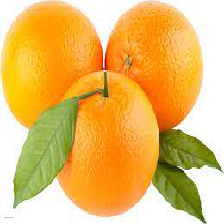

1. orange: 94.88%
2. lemon: 4.92%
3. banana: 0.13%
4. ping-pong_ball: 0.01%
5. pineapple: 0.01%


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import argparse
import cv2

inputShape = (224, 224)
preprocess = imagenet_utils.preprocess_input
image = load_img('/content/image_orange/16.jpg',target_size=inputShape)
img = load_img('/content/image_orange/16.jpg',target_size=inputShape)
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess(image)
model = VGG16(weights="imagenet")
preds = model.predict(image)
P = imagenet_utils.decode_predictions(preds)
display(img)
for (i, (imagenetID, label, prob)) in enumerate(P[0]):
  print("{}. {}: {:.2f}%".format(i + 1, label, prob *100))

In [ ]:
!unzip "/content/935442 Image processing class of 2022.zip" -d "/content/"

Archive:  /content/935442 Image processing class of 2022.zip
   creating: /content/image_orange/
  inflating: /content/image_orange/1.jpg  
  inflating: /content/image_orange/2.jpg  
  inflating: /content/image_orange/3.jpg  
  inflating: /content/image_orange/4.jpg  
  inflating: /content/image_orange/5.jpg  
  inflating: /content/image_orange/6.jpg  
  inflating: /content/image_orange/7.jpg  
  inflating: /content/image_orange/8.jpg  
  inflating: /content/image_orange/9.jpg  
  inflating: /content/image_orange/10.jpg  
  inflating: /content/image_orange/11.jpg  
  inflating: /content/image_orange/12.jpg  
  inflating: /content/image_orange/13.jpg  
  inflating: /content/image_orange/14.jpg  
  inflating: /content/image_orange/15.jpg  
  inflating: /content/image_orange/16.jpg  
  inflating: /content/image_orange/17.jpg  
  inflating: /content/image_orange/18.jpg  
  inflating: /content/image_orange/19.jpg  
  inflating: /content/image_orange/20.jpg  
   creating: /content/image_bana